In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
superior_noplomo = np.loadtxt('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/FlujoRayosCósmicos/Datos/Supsinplomo.txt')
inferior_noplomo = np.loadtxt('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/FlujoRayosCósmicos/Datos/Inferiorsinplomo.txt')

In [3]:
canales = np.arange(0,1024)
canales

array([   0,    1,    2, ..., 1021, 1022, 1023])

Apartado 1. Comprender las funciones de los distintos elementos de la práctica y del montaje para la medida de coincidencias

Apartado 2. Obtener el espectro de amplitudes de los impulsos generados por ambos centelleadores. Para estas medidad, se debe deshabilitar el gate del analizador multicanal (Gata polarity = 2). El analizador se ha configurado para que pare automáticamente la adquisición de los espectros a los 10 minutos.

Apartado 2.1. Comparar los dos espectros obtenidos y reconocer la contribución de los muones y el fondo en los espectros.

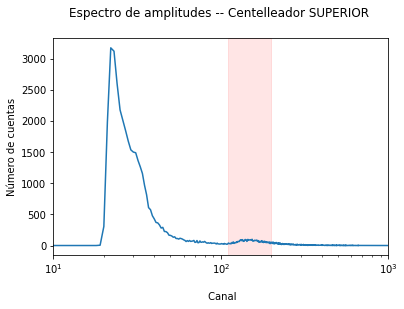

In [4]:
plt.figure()

plt.plot(canales, superior_noplomo, label='Centelleador superior')


plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Espectro de amplitudes -- Centelleador SUPERIOR \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

plt.axvspan(110,200,alpha=.1,color='r')

ruido_inferior = np.sum(inferior_noplomo[:110])
senales_inferior = np.sum(inferior_noplomo[110:200])

Text(0,0.5,'Número de cuentas')

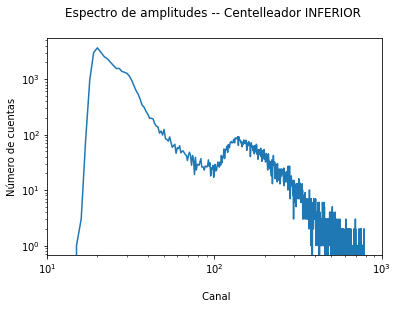

In [5]:
plt.figure()

plt.plot(canales, inferior_noplomo, label='Centelleador inferior')

plt.yscale('log')
plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Espectro de amplitudes -- Centelleador INFERIOR \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

6676.0
6137.0


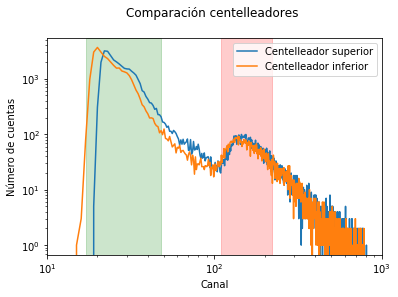

In [33]:
plt.figure()

plt.plot(canales, superior_noplomo, label='Centelleador superior')
plt.plot(canales, inferior_noplomo, label='Centelleador inferior')

plt.xlim(10,10**3)

plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.axvspan(17,48, alpha=0.2, color='g')
plt.axvspan(110,220, alpha=0.2, color='r')

plt.title('Comparación centelleadores \n')
plt.xlabel('Canal')
plt.ylabel('Número de cuentas')

senales_superior = np.sum(superior_noplomo[110:220])
print(senales_superior)
senales_inferior = np.sum(inferior_noplomo[110:220])
print(senales_inferior)

In [34]:
2*6676/(np.pi*645.16*10)*(10**(4))*(1/60)
2*6137.0/(np.pi*645.16*10)*(10**(4))*(1/60)

100.92937005341949

In [35]:
2*np.sqrt(np.sum(superior_noplomo))/(np.pi*645.16*10)*(10**(4))*(1/60)
2*np.sqrt(np.sum(inferior_noplomo))/(np.pi*645.16*10)*(10**(4))*(1/60)

3.470543877976838

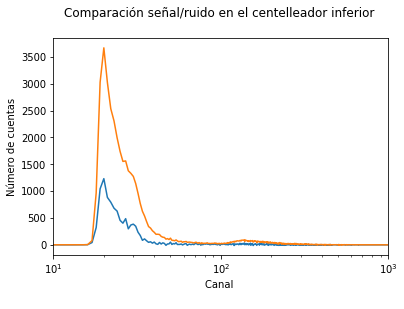

In [39]:
#Cálculo del ruido

ruido = inferior_noplomo - inferior_plomo

plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Comparación señal/ruido en el centelleador inferior \n')
plt.xlabel('Canal \n')
plt.ylabel('Número de cuentas')
plt.plot(canales, ruido)
plt.plot(canales, inferior_noplomo)

Text(0,0.5,'Número de cuentas')

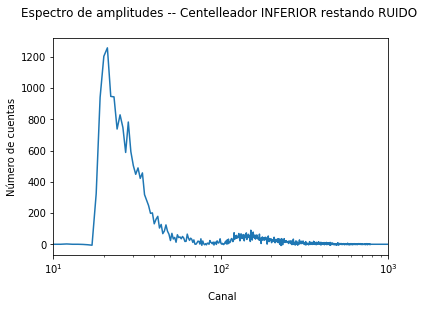

In [40]:
plt.figure()

plt.plot(canales, inferior_noplomo - 2*ruido, label='Centelleador inferior')

plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Espectro de amplitudes -- Centelleador INFERIOR restando RUIDO \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

Apartado 2.2. Estimar el flujo de muones en la dirección vertical por unidad de ángulo sólido, por unidad horizontal de área y por unidad de tiempo. ¿Los resultados obtenidos para ambos centelleadores son compatibles dentro de las incertidumbres experimentales?

In [65]:
#Definición de los parámetros de la medida

#medidas en centímetros

ancho_detector = 25.4
largo_detector = 25.4
area_detector = ancho_detector*largo_detector

#tiempo de medida en minutos

tiempo_medida = 10

print('El área horizontal del detector es {:.2f} cm^2, \n el tiempo de medida es {:.2f} minutos'.format(area_detector, tiempo_medida))

print(area_detector)

El área horizontal del detector es 645.16 cm^2, 
 el tiempo de medida es 10.00 minutos
645.16


#Estimación del flujo de muones en cada uno de los centelleadores. Suponemos que el número de muones que llegan al 
#centelleador es igual a la suma de todas las cuentas recolectadas. Se promedia en ángulo sólido por lo que se
#divide entre 4pi

sum_superior = np.sum(superior_noplomo)
flujo_superior = sum_superior/(4*np.pi*area_detector*tiempo_medida)

print('El flujo medido por el centelleador superior es {:.2f} sr^-1 cm^-2 min^-1'.format(flujo_superior))

sum_inferior = np.sum(inferior_noplomo)
flujo_inferior = sum_inferior/(4*np.pi*area_detector*tiempo_medida)

print('El flujo medido por el centelleador inferior es {:.2f} sr^-1 cm^-2 min^-1'.format(flujo_inferior))

#Estimación del flujo de muones hahiendo quitado el ruido

sum_inferior_ruido = np.sum(inferior_noplomo - 2*ruido)
flujo_inferior_ruido = sum_inferior_ruido/(4*np.pi*area_detector*tiempo_medida)

print(sum_inferior_ruido)
print('El flujo medido por el centelleador inferior (habiendo restado el ruido) es {:.2f} sr^-1 cm^-2 min^-1'.format(flujo_inferior_ruido))

flujo_inferior_ruido_conv = flujo_inferior_ruido*(10**(-4))*(1/60)
print('El flujo de muones medido es {:.2f} x 10^9 sr^-1 m^-2 s^-1'.format(flujo_inferior_ruido_conv*10**9))

sum_superior_ruido = np.sum(superior_noplomo - 2*ruido)
flujo_superior_ruido = sum_superior_ruido/(4*np.pi*area_detector*tiempo_medida)

print('El flujo medido por el centelleador superior (habiendo restado el ruido) es {:.2f} sr^-1 cm^-2 min^-1'.format(flujo_superior_ruido))

flujo_superior_ruido_conv = flujo_superior_ruido*(10**(-4))*(1/60)
print('El flujo de muones medido es {:.2f} x 10^9 sr^-1 m^-2 s^-1'.format(flujo_superior_ruido_conv*10**9))

Apartado 3. Obtener el espectro de amplitudes para el centelleador inferior en coincidencia con señales del centelleador superior usando el montaje descrito. Se debe seleccionar Gate polarity = 0. Para esta medida hay que sincronizar manualmente la adquisición del espectro con el comienzo y la parada del temporizador, que se configura para 10 minutos.

In [66]:
coincidencia_noplomo = np.loadtxt('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/FlujoRayosCósmicos/Datos/coincidencia no plomo.txt')
coincidencia_conplomo = np.loadtxt('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/FlujoRayosCósmicos/Datos/coincidencia con plomo.txt')

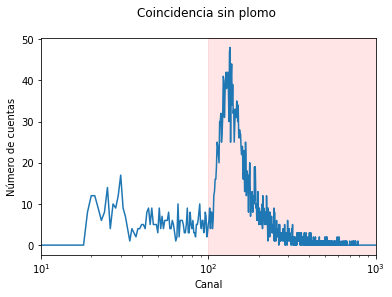

In [94]:
plt.figure()

plt.plot(canales, coincidencia_noplomo)

plt.xscale('log')
plt.xlim(10,10**3)

plt.axvspan(100,1000,alpha=.1,color='r')

plt.title('Coincidencia sin plomo \n')
plt.xlabel('Canal')
plt.ylabel('Número de cuentas')

ruido_coincidencia_noplomo = np.sum(coincidencia_noplomo[:100])
muones_coincidencia_noplomo = np.sum(coincidencia_noplomo[100:])

Apartado 3.1. Comparar este espectro con los obtenidos anteriormente y justificar las diferencias.

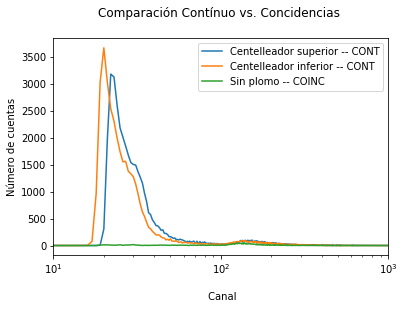

In [71]:
plt.figure()

plt.plot(canales, superior_noplomo, label='Centelleador superior -- CONT')
plt.plot(canales, inferior_noplomo, label='Centelleador inferior -- CONT')
plt.plot(canales, coincidencia_noplomo, label='Sin plomo -- COINC')

plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Comparación Contínuo vs. Concidencias \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

plt.legend()

Apartado 3.2. Estimar la contribución de coincidencias accidentales dado el tiempo en que está activa la puerta lógica durante la medida y el ritmo total de impulsos detectados (muones + fondo) por el centelleador de abajo en la primera medida. De acuerdo con el resultado, ¿qué se puede concluir sobre las distintas componentes del espectro registrado?

In [ ]:
#Estimación del ritmo o frecuencias de contribuciones accidentales cuando medimos en coincidencias
#t_coinc -- tiempo que está abierta la puerta lógica en segundos

t_coinc = 872.519

plt.figure()
plt.plot(canales, coincidencia_noplomo, label='Sin plomo -- COINC')
plt.plot(canales[0:107], coincidencia_noplomo[0:107], label='Coincidencias accidentales')
plt.xlim(0,200)

plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

plt.legend()

coincidencias_accidentales = np.sum(coincidencia_noplomo[0:107])
frecuencia_coincidencias_accidentales = coincidencias_accidentales/t_coinc

print(coincidencias_accidentales, frecuencia_coincidencias_accidentales)

In [ ]:
#Cálculo del ritmo total de recolección en el centelleador inferior en modo contínuo

n_total = np.sum(inferior_noplomo)
n_total

t_rec = 10*60

f_total = n_total/t_rec
f_total

Apartado 4. Obtener de nuevo los espectros de amplitudes para el centelleador inferior, tanto en modo continuo como en coincidencias, pero interponiendo dos niveles de ladrillos de plomo (10 cm en total) entre los detectores.

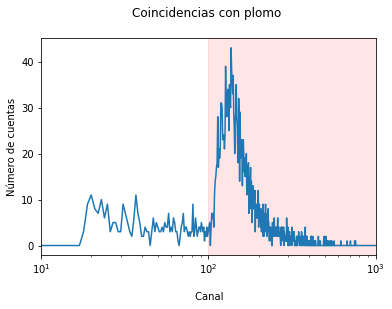

In [88]:
plt.figure()

plt.plot(canales, coincidencia_conplomo)

plt.axvspan(100,1000,alpha=.1,color='r')

plt.xscale('log')
plt.xlim(10,10**3)

plt.title('Coincidencias con plomo \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

ruido_coincidencia_conplomo = np.sum(coincidencia_conplomo[:100])
muones_coincidencia_conplomo = np.sum(coincidencia_conplomo[100:])

In [93]:
#Disminucion relativa coincidencias del ruido

np.abs(ruido_coincidencia_conplomo - ruido_coincidencia_noplomo)/ruido_coincidencia_conplomo*100

36.127167630057805

In [95]:
#Disminucion relatica coincidencias de muones

np.abs(muones_coincidencia_conplomo - muones_coincidencia_noplomo)/muones_coincidencia_conplomo*100

20.934182590233547

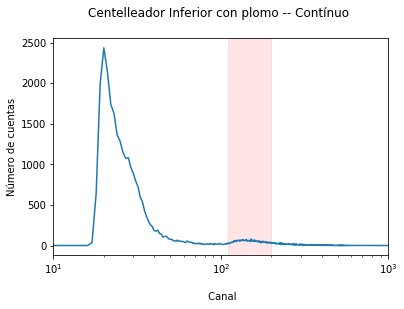

In [105]:
#Espectro del centelleador inferior con 10 cm de plomo superpuestos

inferior_plomo = np.loadtxt('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/FlujoRayosCósmicos/Datos/inferiorconplomo.txt')

plt.title('Centelleador Inferior con plomo -- Contínuo \n')

plt.xscale('log')
plt.xlim(10,10**3)

plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

plt.plot(canales, inferior_plomo)

plt.axvspan(110,200, alpha=.1, color='r')

ruido_inferior_plomo = np.sum(inferior_plomo[:110])
senales_inferior_plomo = np.sum(inferior_plomo[110:200])

In [106]:
#Disminucion relativa ruido continuo 

np.abs(ruido_inferior - ruido_inferior_plomo)/ruido_inferior_plomo*100

39.078942259154275

In [107]:
#Disminución relativa de muones continuo+

np.abs(senales_inferior - senales_inferior_plomo)/senales_inferior_plomo*100

20.970231532524807

Apartado 4.2. Justificar el efecto del plomo sobre los espectros obtenidos. ¿En qué proporción disminuyen cada componente del espectro debido al plomo?¿ Se puede sacar alguna conclusión sobre el origen del fondo de acuerdo a los resultados obtenidos?

In [ ]:
#Coincidencia con plomo

plt.figure()

plt.plot(canales, coincidencia_conplomo)
plt.plot(canales[0:107], coincidencia_conplomo[0:107])
plt.plot(canales[108:], coincidencia_conplomo[108:])


plt.xlim(0,800)

plt.title('Coincidencias con plomo \n')
plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

coincidencias_accidentales_conplomo = np.sum(coincidencia_conplomo[0:107])
coincidencias_conplomo = np.sum(coincidencia_conplomo[108:])

print('Coincidencias accidentales con plomo {:.2f}'.format(coincidencias_accidentales_conplomo))
print('Coincidencias con plomo {:.2f}'.format(coincidencias_conplomo))

#Coincidencia sin plomo

plt.figure()
plt.plot(canales, coincidencia_noplomo, label='Sin plomo -- COINC')
plt.plot(canales[0:107], coincidencia_noplomo[0:107], label='Coincidencias accidentales')
plt.plot(canales[108:], coincidencia_noplomo[108:], label='Coincidencias')
plt.xlim(0,800)

plt.xlabel('\n Canal')
plt.ylabel('Número de cuentas')

plt.legend()

coincidencias_accidentales = np.sum(coincidencia_noplomo[0:107])
señal_sinplomo = np.sum(coincidencia_noplomo[108:])

print('Coincidencias accidentales sin plomo {:.2f}'.format(coincidencias_accidentales))
print('Coincidencias sin plomo {:.2f}'.format(señal_sinplomo))

dif_rel_coincidencias_accidentales = np.abs(coincidencias_accidentales - coincidencias_accidentales_conplomo)/coincidencias_accidentales*100
dif_rel_coincidencias = np.abs(señal_sinplomo - coincidencias_conplomo)/señal_sinplomo*100

print('Disminución en las coincidencias accidentales {:.2f} %'.format(dif_rel_coincidencias_accidentales))
print('Disminución en las coincidencias {:.2f} %'.format(dif_rel_coincidencias))